In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path_folder_historical_demand = Path.cwd() / "data" / "input" / "unprocessed" / "historical_demand"
path_folder_historical_renewable = Path.cwd() / "data" / "input" / "unprocessed" / "historical_renewable"

In [8]:
df = pd.read_csv(path_folder_historical_renewable / "한국전력거래소_신재생 발전량 및 설비용량_20221231.csv", encoding="cp949")

In [15]:
df

,거래일자,거래시간,원료원,설비용량(MW),전력거래량(MWh)
0,20220101,1,바이오가스,85.609,44.793166
1,20220101,2,바이오가스,85.609,42.926766
2,20220101,3,바이오가스,85.609,43.973171
3,20220101,4,바이오가스,85.609,44.745072
4,20220101,5,바이오가스,85.609,44.174461
...,...,...,...,...,...
96355,20221231,20,바이오중유,390.000,206.466064
96356,20221231,21,바이오중유,390.000,204.811880
96357,20221231,22,바이오중유,390.000,204.567440
96358,20221231,23,바이오중유,390.000,204.724016


In [18]:
df = (
    df.groupby(["거래일자", "거래시간"], as_index=False)
      [["설비용량(MW)", "전력거래량(MWh)"]]
      .sum()
)
rec = df["설비용량(MW)"].values
reg = df["전력거래량(MWh)"].values

In [ ]:
timestamp = np.arange(np.datetime64("2022-01-01T00"), np.datetime64("2023-01-01T00"))

In [25]:
reg_historical = np.load("/disk/disk3/gyeongmin/pse_unit_commitment/data/input/processed/KPG193_ver1_2/renewable_p_max_2022.npy")

In [32]:
np.where(timestamp == target_end)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

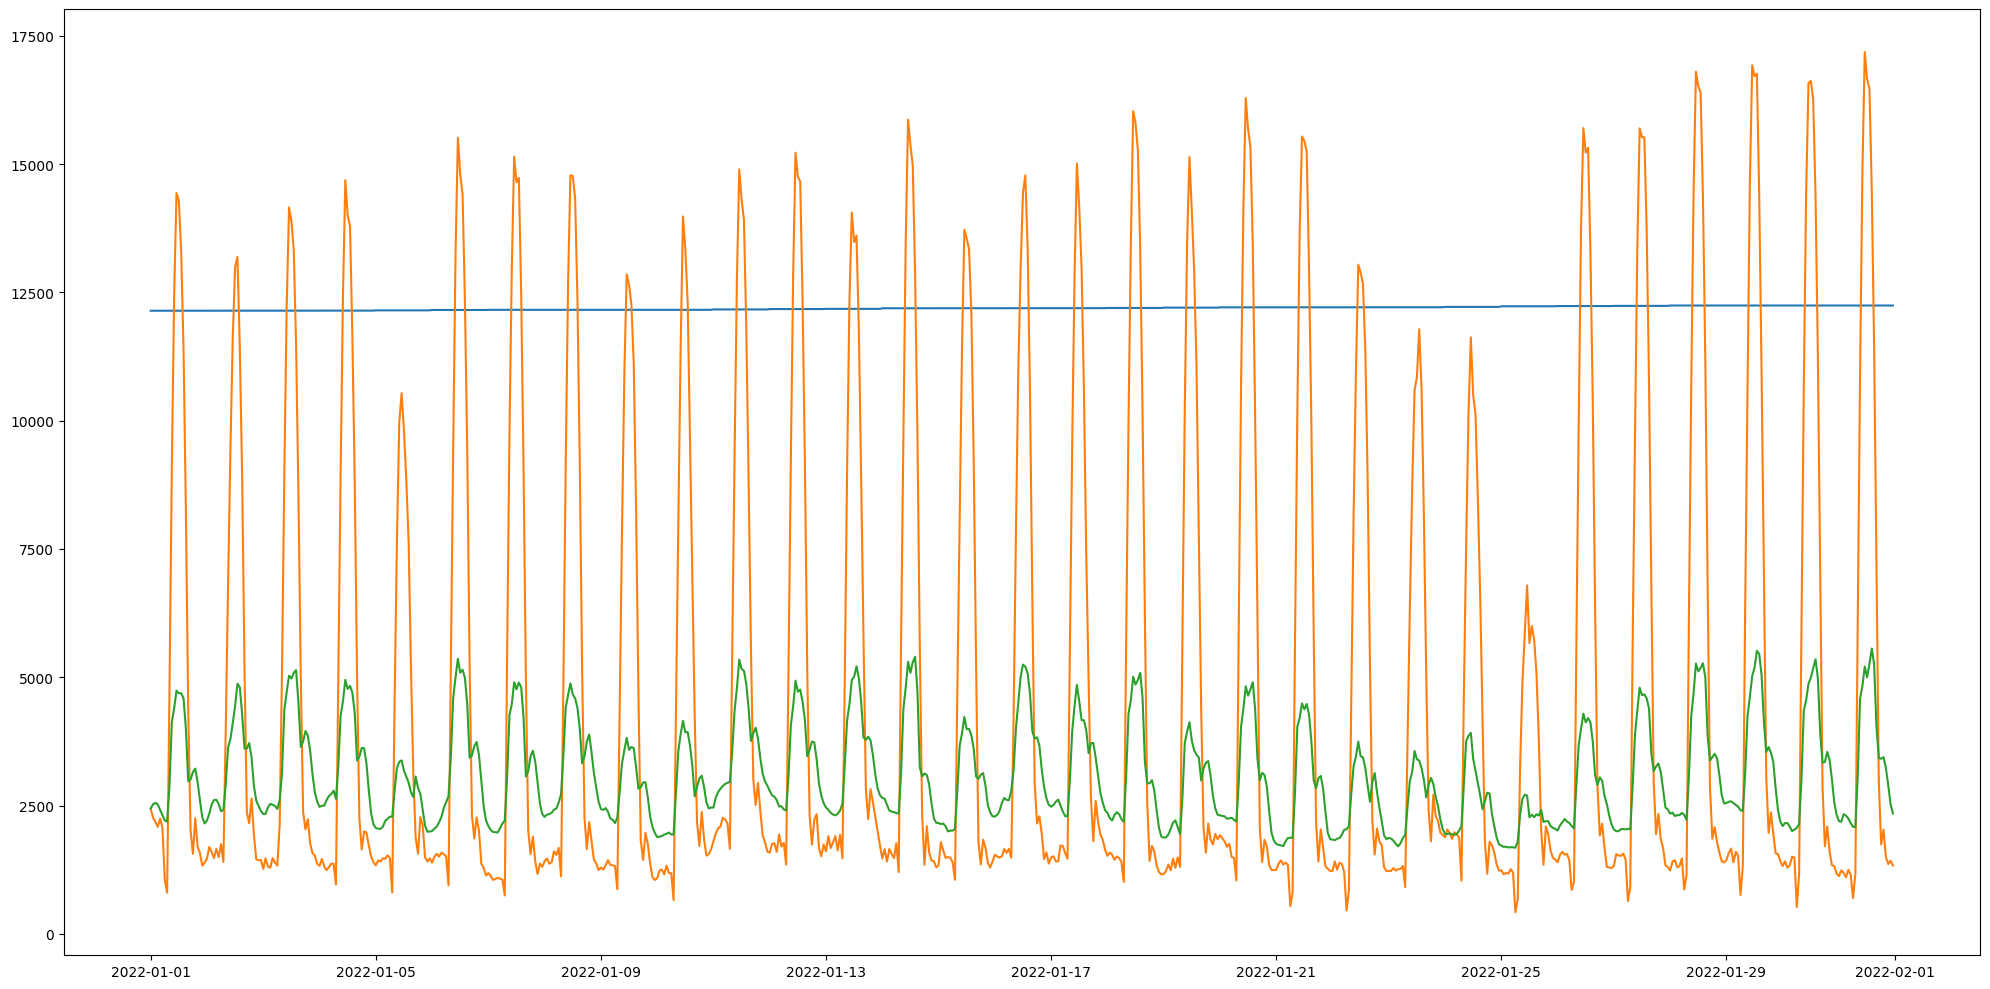

In [33]:
target_start, target_end = np.datetime64("2022-01-01T00"), np.datetime64("2022-01-31T23")
idx_target_start, idx_target_end = np.where(timestamp == target_start)[0][0], np.where(timestamp == target_end)[0][0]


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(timestamp[idx_target_start: idx_target_end + 1], rec[idx_target_start: idx_target_end + 1])
ax.plot(timestamp[idx_target_start: idx_target_end + 1], reg_historical[idx_target_start: idx_target_end + 1])
ax.plot(timestamp[idx_target_start: idx_target_end + 1], reg[idx_target_start: idx_target_end + 1])

plt.tight_layout()
plt.show()

In [ ]:
"한국전력거래소_신재생 발전량 및 설비용량_20221231.csv"